**Evolution of a Sandy Coastline**

**1. Introduction**

**Motivation and Theme**

The main focus of this study is the evolution of a sandy coastline as a function of alongshore sediment transport. We want to model this because this process is a complex and dynamic system that is constantly affected by both natural (wind, waves, rising sea levels) and anthropogenic (coastal buildings, dredging) forces.

**Why is this important?**

This is important because coastal areas are typically highly developed, with 40% of the United States population alone living within a coastal county (CITE NOAA ARTICLE HERE). This means that these areas are highly suscepitble to natural coastal hazards such as erosion and flooding. As coastlines change over time, accurate modeling and forecasting of these changes is imperative to protect development and livelihood.

**Methods Used**

We will utilize a simplified, one-line model to represent the changing coastline. This model functions on the assumption that the 3d profile of the sand on the beach (from crest to depth) moves shoreward or seaward without changing its shape. Therefore, we can represent the entire system by tracking the movemnt of a single contour line, the shoreline. This process is governed by alongshore sediment transport and ignores cross-shore transport of mass (movement perpendicular to the coast). By combining the principle of mass conservation of sediment (or the Continuity Equation) with the simplified relationship for alongshore transport rate (Q), we create a closed system that utilizes the One-Dimensional Diffusion Equation.

**Other Models**

We are using the One-Line Diffusion Model as it is very effective for large-scale and long-term analysis, however there are better equipped, more complex models as well. Some scientists modeling the evolution of a sandy coastlien may utilize multi-line models. These account for both the along-shore and cross-shore movement of sediment. Because they model multiple directions of movement, it is possible to also model the changes in shape of the shoreline. One example of these models include the SBEACH model (CITE HERE). There are also process-based 3D models available that are much more computationally complex. Some examples of these include DELft3D and XBeach, which also utilize coupled equations for water flow, wave propagation, and sediment transport in three directions (CITE HERE). These models are used for more short-term analyses of speicific coastal properties and structures.

Equations (10 pts)
What are the fundamental physical/chemical/etc processes?
Include the relevant equations and potentially where they come from (i.e. how are they derived)
Describe all terms, variables, parameters, boundary conditions and initial conditions
Describe any assumptions being made

**2. Equations**

**Fundamental Processes**

The fundamental process governing our model is Conservation of Mass. The rate of change of the volume of sand within a specific section of coastline must be equal to the difference between the alongshore sediment transport rate flowing in and flowing out of the coastline section.

**Governing Equation**

**A. Continuity Equation**

This equation relates the change in shoreline position ($\partial y / \partial t$) to the alongshore chnage in sediment transport ($\partial Q / \partial x$).

$$\frac{\partial y}{\partial t} = - \frac{1}{D} \frac{\partial Q}{\partial x}$$

This shows that the chnage in the sediment volume is proportional to the change in the shoreline position scaled by a constant depth of the sand. Since the right hand side of the equation is negative, it hsows that a decrease in transport rate alongside the coast ($\partial Q / \partial x < 0$) causes accretion along the coastline ($\partial y / \partial t > 0$).

**B. Transport Equation**

This equation shows that the alongshore transport rate, Q, is proportional to the local alongshore slope of the shoreline.

$$Q = -K \frac{\partial y}{\partial x}$$

**C. Governing Partial Differential Equation**

We substitute the Transport Equation (B) into the Continuity Equation (A) in order to close the system. This results in the One-dimensional Diffusion Equation:

$$\frac{\partial y}{\partial t} = \frac{K}{D} \frac{\partial^2 y}{\partial x^2}$$



**Terms, Variables, and Parameters**

y(x,t) is the cross-shore position of the shoreline (m)

x is the along-shore distance (m)

t is the time (s)

K is the empirical transport coefficient (related to wave energy) (m^2/s)

D is the effective depth of closure


**Boundary Conditions and Initial Conditions**

**Assumptions**

Numerical methods (20 pts)
Describe the numerical method used.
Why did you choose to use these methods?
Code works as intended

**3. Numerical Methods**

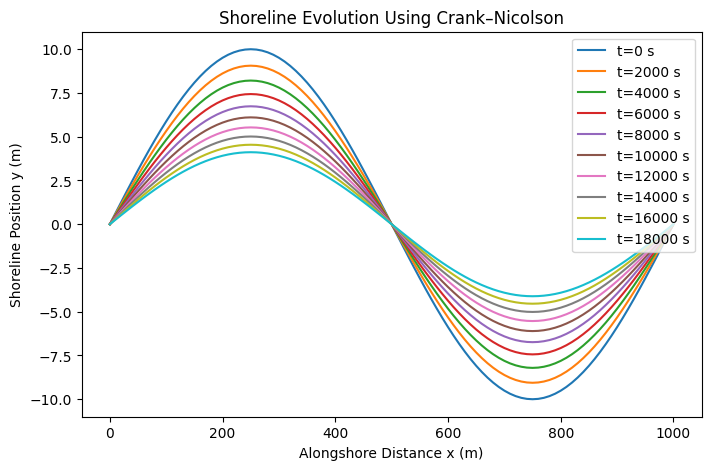

In [ ]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

#Known Variables
K = 10      # m^2/s  - transport coefficient
D = 8       # m      - effective depth of closure
alpha = K/D # diffusivity m/s

L = 1000    # m - coastline length
dx = 10     # m - spatial step
dt = 1      # s - time step
tf = 20000  # s - total simulation time

nx = int(L/dx) + 1  #Number of grid point
nt = int(tf/dt)     #Number of time steps

x = np.linspace(0, L, nx) #Create array of x positions from 0 to L

#Crank–Nicolson coefficient
C = alpha * dt / (2 * dx**2)

#Initial and boundary conditions
y_old = np.zeros(nx)             #Starting with zero
y_old = 10*np.sin(2*np.pi*x/L)   #
y_all = np.zeros((nx, nt))

#Boundary conditions at x=0 and x=L
bc_left  = 0
bc_right = 0

#Create Matrices
diags = np.array([-1, 0, 1])

#Building matrix for left hand side
M1_data = np.array([-C*np.ones(nx),(1+2*C)*np.ones(nx), -C*np.ones(nx)])
M1 = spdiags(M1_data, diags, nx, nx).toarray()

#Building matrix for right hand side
M2_data = np.array([C*np.ones(nx),(1-2*C)*np.ones(nx), C*np.ones(nx)])
M2 = spdiags(M2_data, diags, nx, nx).toarray()

#Apply boundary conditions to matrices
M1[0,0] = 1
M1[0,1] = 0
M1[-1,-1] = 1
M1[-1,-2] = 0

M2[0,0] = 1
M2[0,1] = 0
M2[-1,-1] = 1
M2[-1,-2] = 0


# Time-stepping loop
for n in range(nt):

    #Right-hand side
    b = np.matmul(M2, y_old)

    #Boundary conditions
    b[0]  = bc_left
    b[-1] = bc_right

    #Solve the linear system
    y_new = np.linalg.solve(M1, b)

    #Update solution
    y_old = y_new.copy()
    y_all[:, n] = y_old

#Create the figure and plot
plt.figure(figsize=(8,5))
for n in range(0, nt, nt//10):
    plt.plot(x, y_all[:, n], label=f"t={n*dt:.0f} s")

plt.xlabel('Alongshore Distance x (m)')
plt.ylabel('Shoreline Position y (m)')
plt.title('Shoreline Evolution Using Crank–Nicolson')
plt.legend()
plt.show()


Results (20 pts)
What simulations did you run with the model?
Describe the results.
How do the results compare with any known solutions, or observations/data?
How do the results change with different methods, time steps, grid spacing, or model parameters?
What did the model tell you about the process you are studying?
How could the model be improved in terms of methods used or processes included?


**4. Results**

**Possible Improvements**

Figures (10 pts)
At least 4 figures describing results
Have all axes labeled
All variables have units
Everything is readable
Colors, lines, contours, etc. are all easy to discern

**5. Figures**

**6. Video Walkthrough**

embed here

**7. References**